<a href="https://colab.research.google.com/github/lisatwyw/data-gym/blob/master/biosppy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oveview #

Exploring the [```biosppy```](https://github.com/PIA-Group/BioSPPy) preprocessing toolkit



## A) Mount and create subfolder ```MUSE```##

In [280]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Mounted at /content/gdrive


## B) Install biosppy  ##


In [8]:
! pip install biosppy

from biosppy import storage
from biosppy.signals import ecg

## C) Download sample ##

In [11]:
! wget -O biosppy_ecg.txt https://github.com/PIA-Group/BioSPPy/raw/master/examples/ecg.txt

--2020-05-07 22:09:24--  https://github.com/PIA-Group/BioSPPy/raw/master/examples/ecg.txt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt [following]
--2020-05-07 22:09:24--  https://raw.githubusercontent.com/PIA-Group/BioSPPy/master/examples/ecg.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘biosppy_ecg.txt’

biosppy_ecg.txt     100%[===================>] 102.62K  --.-KB/s    in 0.04s   

2020-05-07 22:09:24 (2.74 MB/s) - ‘biosppy_ecg.txt’ saved [105085/105085]



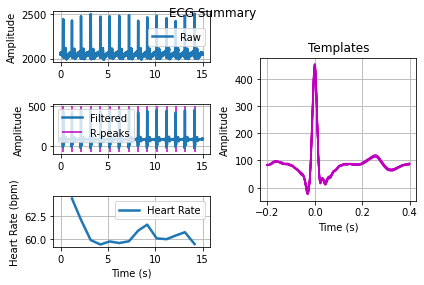

(15000,)


In [14]:
signal, mdata = storage.load_txt('biosppy_ecg.txt')
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

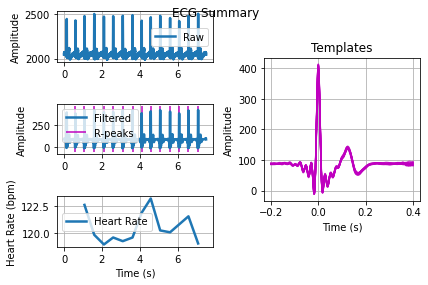

In [32]:
out = ecg.ecg(signal=signal, sampling_rate=1000., show=True)

## D) Apply ECG preprocessing using data in ```MUSE``` subfolder (already downloaded) ##

Leads: Index(['45.607', '116.11', '59.548', '-79.862', '-7.1287', '90.361', '-275.89',
       '-302.23', '-80.226', '-29.349', '3.8533', '40.351'],
      dtype='object')


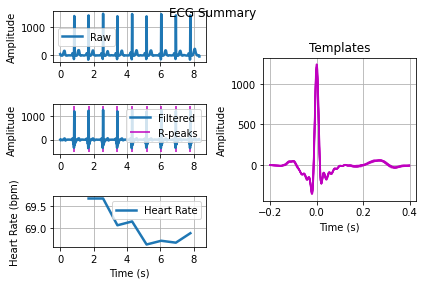

In [39]:
import pandas as pd
import glob

os.chdir('/content/drive/My Drive/Colab Notebooks/opensource_datasets/MUSE')
files = glob.glob('ECGDataDenoised/*csv') 
len(files)
df = pd.read_csv(files[0])
print('Leads:', df.keys())


signal2=df['45.607']
out2 = ecg.ecg(signal=signal2, sampling_rate=600., show=True)


In [0]:
signal2=df['45.607']
out2 = ecg.ecg(signal=signal2, sampling_rate=600., show=True)
